<a href="https://colab.research.google.com/github/shriver42/ESAA/blob/project/YB_1%EC%A1%B0_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니 프로젝트1 YB 1조
# <영화 관객수 데이터 분석>


# 1. 라이브러리와 데이터셋 불러오기

라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings #경고메시지 무시
warnings.filterwarnings(action='ignore')

In [ ]:
# 그래프에서 한글 폰트가 깨지는 것을 방지하기 위해 필요한 요소 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False

데이터 불러오기

In [ ]:
# train data 불러오기
train=pd.read_csv("/content/movies_train.csv")

# 2. 데이터 탐색하기

In [ ]:
# 상위 다섯 개의 행 출력
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
# 데이터프레임의 행과 열 크기 출력
print('DataFrame 크기:' , train.shape)

DataFrame 크기: (600, 12)


데이터프레임에서 변수는 12개, 영화(데이터)는 총 600개임을 알 수 있다.

In [ ]:
# 칼럼별 결측치 개수, 데이터타입(Dtype) 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  600 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 56.4+ KB


< train.info()로 출력된 정보 중 전처리 시 반영해야할 것>
1. 일곱번째 변수인 dir_prev_bfnum에 330개의 결측치가 존재함을 알 수 있다.
2. "release_time"의 데이터타입이 object임을 알 수있다.


In [ ]:
# 각 열에 해당하는 데이터의 분포 확인 (숫자형 데이터만 확인 가능)
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,6.000000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,4.726993e+05,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.309474e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,0.000000e+00,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,0.000000e+00,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,3.761416e+05,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [ ]:
# 결측값을 가진 데이터 다섯 개 출력
train[train['dir_prev_bfnum'].isna()].head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num


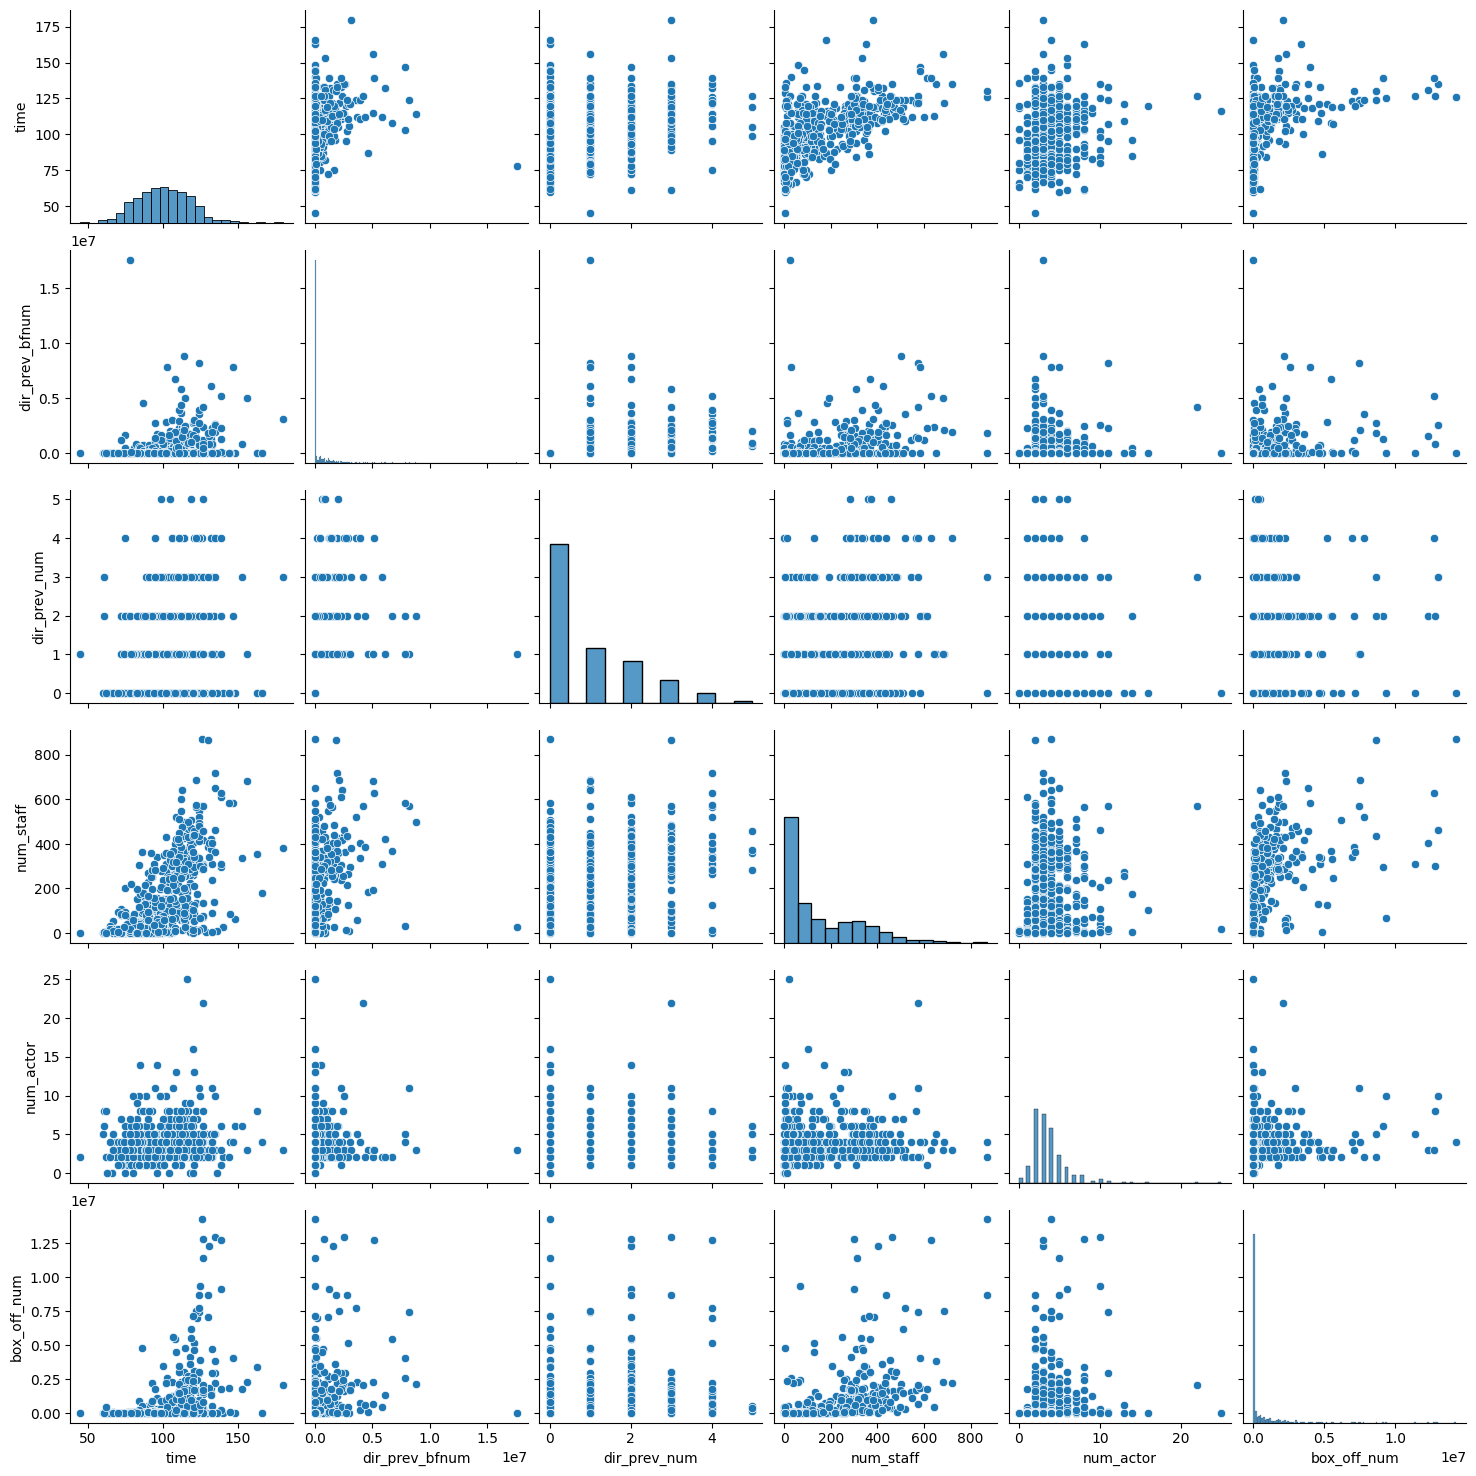

In [ ]:
# 변수 간 correlation plot 표현하기
sns.pairplot(data=train)
plt.show()

# 3. 데이터 전처리

데이터 탐색을 통해 "dir_prev_bfnum"이라는 변수가 결측치를 포함하고 있음을 알 수 있었다. "dir_prev_bfnum"은 해당 감독의 이전 영화에서의 평균 관객수이므로, 이 변수에 해당하는 값이 NaN이라는 것은 이전까지 영화를 제작한 적 없는 감독의 영화라는 것을 의미한다.

따라서 결측값을 NaN을 0으로 대체한다.

In [ ]:
train['dir_prev_bfnum'] = train['dir_prev_bfnum'].fillna(0)

In [ ]:
# 결측값이 0으로 바뀌었는지 확인
train['dir_prev_bfnum'].head(5)

0          0.00
1    1161602.50
2     220775.25
3      23894.00
4          1.00
Name: dir_prev_bfnum, dtype: float64

영화 개봉일 변수인 "release_time"의 데이터타입이 object였으므로, datetime으로 데이터 타입을 바꿔준다.

In [ ]:
train['release_time']=pd.to_datetime(train['release_time'])

In [ ]:
# 데이터 타입이 바뀌었는지 확인
train['release_time'].head(5)

0   2012-11-22
1   2015-11-19
2   2013-06-05
3   2012-07-12
4   2010-11-04
Name: release_time, dtype: datetime64[ns]

# 4. 데이터 분석과 시각화

## 1. 영화의 관람 등급과 평균 관객수의 상관관계 분석

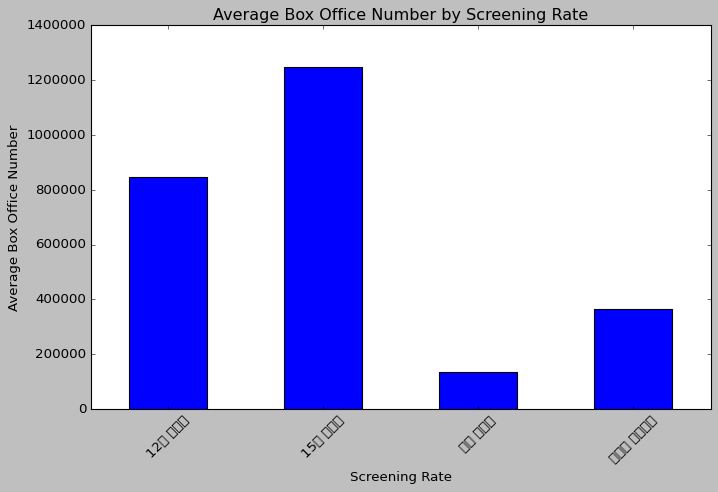

In [ ]:
# screening_rat 범주별로 box_off_num의 평균 계산
avg_box_off_by_rat = train.groupby('screening_rat')['box_off_num'].mean()

# 결과 시각화
plt.figure(figsize=(10, 6))
avg_box_off_by_rat.plot(kind='bar')
plt.title('Average Box Office Number by Screening Rate')
plt.xlabel('Screening Rate')
plt.ylabel('Average Box Office Number')
plt.xticks(rotation=45)  # screening_rat 값이 겹치지 않도록 회전
plt.show()

**분석결과**

bar plot을 통해 12세와 15세 관람가 영화가 평균적으로 높은 관객 수를 기록했음을 확인할 수 있다.

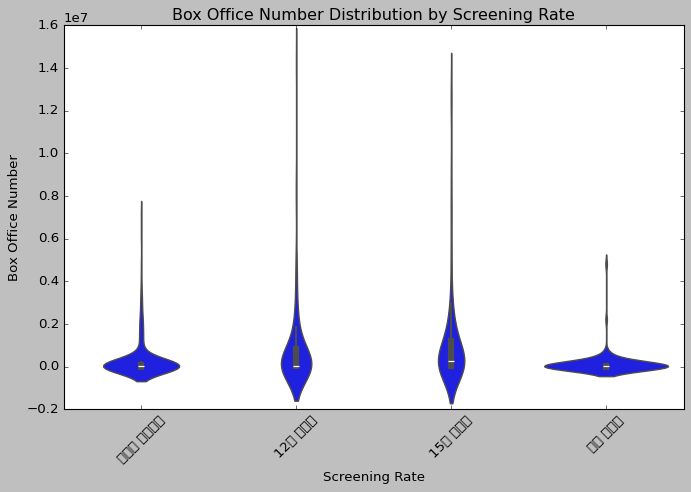

In [ ]:
# 바이올린 플롯 그리기
plt.figure(figsize=(10, 6))
sns.violinplot(x='screening_rat', y='box_off_num', data=train)

plt.title('Box Office Number Distribution by Screening Rate')
plt.xlabel('Screening Rate')
plt.ylabel('Box Office Number')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

**분석 결과**


violin plot을 통해 흥행을 거둔 영화들 대부분이 12세 또는 15세 관람가에 해당함을 알 수 있다.

## 2. 감독에 따른 관객수 분석

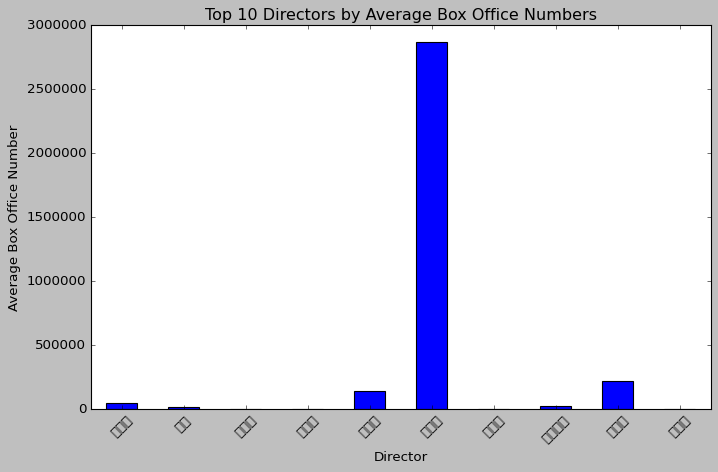

In [ ]:
# 촬영한 영화 수가 많은 순서대로 감독 10명을 추출함
director_counts = train['director'].value_counts()
top10_directors = director_counts.head(10).index
top10_directors_data = train[train['director'].isin(top10_directors)]

# 상위 10명의 감독별로 'box_off_num'의 평균 계산
avg_box_off = top10_directors_data.groupby('director')['box_off_num'].mean().reindex(top10_directors)

# 그래프 그리기
plt.figure(figsize=(10, 6))
avg_box_off.plot(kind='bar')
plt.title('Top 10 Directors by Average Box Office Numbers')
plt.xlabel('Director')
plt.ylabel('Average Box Office Number')
plt.xticks(rotation=45)  # 감독 이름이 그래프 위에서 겹치지 않도록 회전시킴
plt.show()

**분석 결과**

감독에 따른 평균 관객수를 분석하기 위해, 작품 수가 많은 상위 10명의 감독을 대상으로 그들의 영화 평균 관객수에 대한 데이터를 시각화했다.

모든 감독의 평균 관객수를 표현하는 것이 불가능해 작품수가 많은 감독 중 상위 10명을 추출해 plot을 출력했다.

그 결과, 대부분의 감독이 비슷한 수준의 평균 관객수를 보였으나,우민호 감독의 영화가 눈에 띄게 많은 관객수를 동원했음을 알 수 있다.

우민호 감독의 작품은 각각 707만명, 101만명, 131만명, 208만명을 동원했기 때문에 평균 관객수가 상대적으로 높게 나타났음을 알 수 있다.

작품 수가 가장 많은 것으로 알려진 홍상수 감독의 영화와 비교했을 때, 우민호 감독의 영화가 상대적으로 더 많은 관객을 끌어모았다는 사실을 명확히 알 수 있다.

In [ ]:
train[train["director"] == "우민호"].head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,strnum,hour,min,grouptime
58,파괴된 사나이,시너지,공포,2010-07-01,114,청소년 관람불가,우민호,0.0,0,290,5,1012310,0,1,54,"(110, 120]"
63,간첩,롯데엔터테인먼트,드라마,2012-09-20,115,15세 관람가,우민호,1012310.0,1,372,5,1310895,1,1,55,"(110, 120]"
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,2,2,10,"(120, 130]"
377,내부자들: 디 오리지널,(주)쇼박스,느와르,2015-12-31,180,청소년 관람불가,우민호,3131902.0,3,382,3,2084844,3,3,0,"(170, 180]"


In [ ]:
train[train["director"] == "홍상수"].head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,strnum,hour,min,grouptime
331,다른나라에서,(주) 영화제작전원사,드라마,2012-05-31,89,청소년 관람불가,홍상수,0.0,0,70,2,31101,0,1,29,"(80, 90]"
523,옥희의 영화,스폰지,드라마,2010-09-16,80,청소년 관람불가,홍상수,0.0,0,57,3,37122,0,1,20,"(70, 80]"
506,우리 선희,(주) 영화제작전원사,드라마,2013-09-12,89,청소년 관람불가,홍상수,0.0,0,8,6,69122,0,1,29,"(80, 90]"
115,북촌방향,(주) 영화사조제,드라마,2011-09-08,79,청소년 관람불가,홍상수,0.0,0,55,5,46212,0,1,19,"(70, 80]"
19,하하하,스폰지,드라마,2010-05-05,115,청소년 관람불가,홍상수,0.0,0,74,9,57029,0,1,55,"(110, 120]"


## 3. 상영 시간에 따른 관객 수

In [ ]:
# time (상영 시간) : 연속형 , box_off_num : 연속형 (관객수)
train['hour'] = train['time'] // 60
train['min'] = train['time'] % 60
train.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,strnum,hour,min
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,0,1,36
350,페이스메이커,시너지,드라마,2012-01-18,124,12세 관람가,김달중,0.0,0,496,4,467697,0,2,4
349,필름시대사랑,(주)스마일이엔티,드라마,2015-10-22,70,15세 관람가,장률,0.0,0,94,4,1611,0,1,10


<Axes: ylabel='Frequency'>

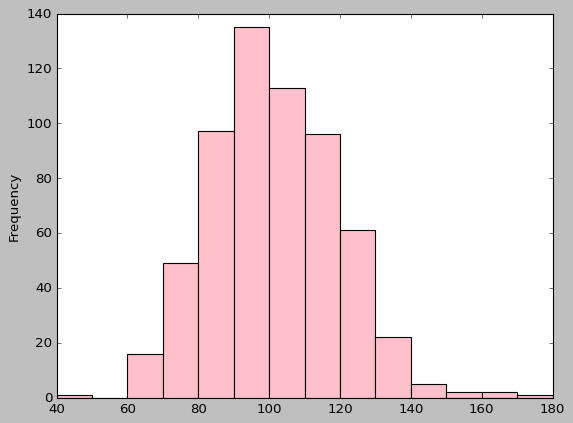

In [ ]:
plt.style.use('classic')
train['time'].plot(kind='hist', color='pink', bins=range(40, 190, 10))

**데이터 내 있는 영화의 상영 시간 분포 알아보기**

최솟값인 45분 부터 180분까지 14개의 구간 (10분 단위) 로 쪼개서 살펴보기

연속형이므로 히스토그램으로 살펴본다.

**상영 시간이 90분-100분인 영화가 가장 많다. 상영 시간이 2시간이 넘어가면서 점차 영화 수가 줄어드는 양상을 보인다**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, '(40, 50]'),
  Text(1, 0, '(50, 60]'),
  Text(2, 0, '(60, 70]'),
  Text(3, 0, '(70, 80]'),
  Text(4, 0, '(80, 90]'),
  Text(5, 0, '(90, 100]'),
  Text(6, 0, '(100, 110]'),
  Text(7, 0, '(110, 120]'),
  Text(8, 0, '(120, 130]'),
  Text(9, 0, '(130, 140]'),
  Text(10, 0, '(140, 150]'),
  Text(11, 0, '(150, 160]'),
  Text(12, 0, '(160, 170]'),
  Text(13, 0, '(170, 180]')])

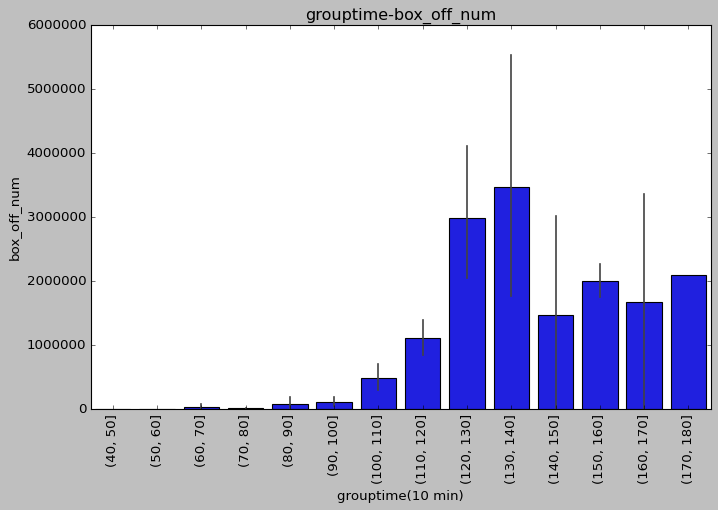

In [ ]:
train['grouptime'] = pd.cut(train['time'], bins=range(40,190,10))
plt.figure(figsize = (10,6))
sns.barplot(x='grouptime', y='box_off_num', data = train,
            estimator = lambda x : sum(x) / len(x))
plt.xlabel('grouptime(10 min)')
plt.ylabel('box_off_num')
plt.title('grouptime-box_off_num')
plt.xticks(rotation='vertical')

**상영 시간에 따른 평균 관객수 알아보기**
상영 시간대에 따라 영화의 개수가 다르므로 시간 구간별 상영시간의 총합을 알아보면 실제 분포와 다를 수 있다. 따라서 구간별 관객 수의 대푯값이라고 할 수 있는 '평균'에 따른 분포를 조사하였다.
H0 : 상영 기간이 너무 긴 시간대의 영화는 평균 관객수가 적을 것이다.

조사 결과는 다음과 같다.
- 상영 시간이 130분 - 140분인 영화의 평균 관객 수는 300만 명 이상으로 가장 높았다.
- 예상과 달리 상영 시간이 180분 즉 3시간에 육박하는 영화의 평균 관객 수는 2백만 명 이상으로 다소 높게 나타났다.

In [ ]:
train[(train['hour']==2) & (train['min']>=30)]
# 상영 시간 2시간 30분 이상

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,strnum,hour,min,grouptime
438,산다,리틀빅픽처스,드라마,2015-05-21,166,청소년 관람불가,박정범,0.0,0,180,4,4398,0,2,46,"(160, 170]"
209,이끼,시네마서비스,드라마,2010-07-14,163,청소년 관람불가,강우석,0.0,0,353,8,3350311,0,2,43,"(160, 170]"
477,황해,(주)쇼박스,느와르,2010-12-22,156,청소년 관람불가,나홍진,5046096.0,1,683,3,2260512,1,2,36,"(150, 160]"
422,전설의 주먹,CJ 엔터테인먼트,액션,2013-04-10,153,청소년 관람불가,강우석,844821.0,3,335,6,1744585,3,2,33,"(150, 160]"


In [ ]:
train[train['hour']==3]
# 상영 시간 3시간 이상

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,strnum,hour,min,grouptime
377,내부자들: 디 오리지널,(주)쇼박스,느와르,2015-12-31,180,청소년 관람불가,우민호,3131902.0,3,382,3,2084844,3,3,0,"(170, 180]"


**상영 시간대가 150분-180분인 영화 자세히 보기**

세시간 이상의 영화는 관객에게 부담이 될 수 있어 관객 수가 낮을 것이라고 예측했는데 예상보다 높게 나와서 이 시간대에 어떤 영화가 있는지 알아본다.
- 이끼, 산다, 내부자들: 디 오리지널, 산다, 황해의 5개 영화 추출
- 이끼, 내부자들, 황해: 2백만 이상, 산다 : 4천명대
- 2백만대의 공통 흥행 요인 분석 : 해당 영화 이전에 만든 영화가 존재하고 관객 수가 80만 명 이상임.

## 4. 감독의 네임벨류에 따른 영화의 규모
영화 규모의 지표 : 주연 배우수(num_actor), 스텝 수(num_staff)

In [ ]:
train['director'].value_counts()

홍상수           7
장률            4
신재호           4
우민호           4
노진수           4
             ..
권오광           1
한윤선           1
박찬경           1
New Pistol    1
백운학           1
Name: director, Length: 472, dtype: int64

In [ ]:
named = train.groupby('director').mean('box_off_num')
named.sort_values(by='box_off_num', ascending=False, inplace=True)
named
# 감독에 따른 관객수 평균 - 내림차순 정렬 (네임드 감독 지표) 윤제균 > 최동훈 > 양우석 > 봉준호 > 한재림 ...

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
director,,,,,,
윤제균,126.0,0.000000e+00,0.0,869.0,4.0,14262766.0
최동훈,137.0,3.867085e+06,3.5,545.0,6.5,12845252.0
양우석,127.0,0.000000e+00,0.0,311.0,5.0,11374879.0
봉준호,125.0,0.000000e+00,0.0,67.0,10.0,9350351.0
한재림,139.0,1.242778e+06,2.0,298.0,6.0,9135806.0
...,...,...,...,...,...,...
진광교,98.0,0.000000e+00,0.0,1.0,2.0,36.0
이세일,71.0,0.000000e+00,0.0,0.0,3.0,10.0
고구마,78.0,1.761531e+07,1.0,27.0,3.0,8.0


H0 : 네임드 감독일수록 (평균 관객수가 많을수록) 주연 배우수가 많을 것이다.

H0 : 네임드 감독일수록 (평균 관객수가 많을수록) 스태프 수가 많을 것이다.

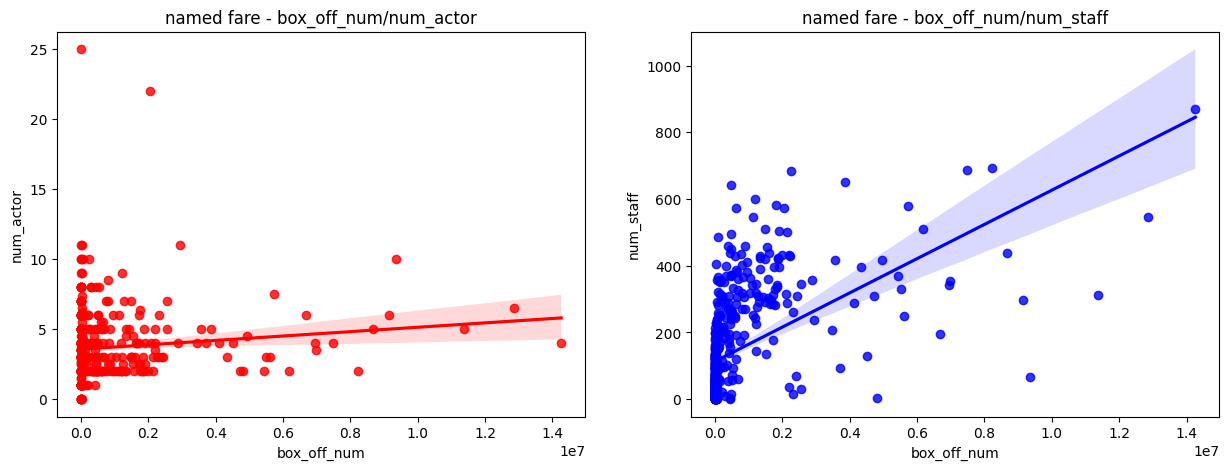

In [ ]:
plt.style.use('default')
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
# 네임드 감독에 따른 주연배우수, 스탭 수 산점도 그리기
sns.regplot(x='box_off_num', y='num_actor', data=named, ax=ax1, color='red')
sns.regplot(x='box_off_num', y='num_staff', data=named, ax=ax2, color='blue')
ax1.set_title('named fare - box_off_num/num_actor')
ax2.set_title('named fare - box_off_num/num_staff')
plt.show()

- 네임드 감독에 따라 주연 배우수는 차이가 없지만, 스태프의 수는 강한 양의 상관관계를 나타낸다.
- 유명한 감독일수록 스태프 수가 증가하는 것으로 보아, 네임밸류에 따라 투자자들의 투자를 많이 받아 영화의 규모가 커지는 것으로 추측할 수 있다.
- 주연 배우수는 거의 선형 관계가 없는 것으로 보아, 주연 배우수는 감독의 네임밸류, 영화 규모에 크게 국한되지 않는 것 같다.

Text(0.5, 1.0, 'prev_box_num/num_actor')

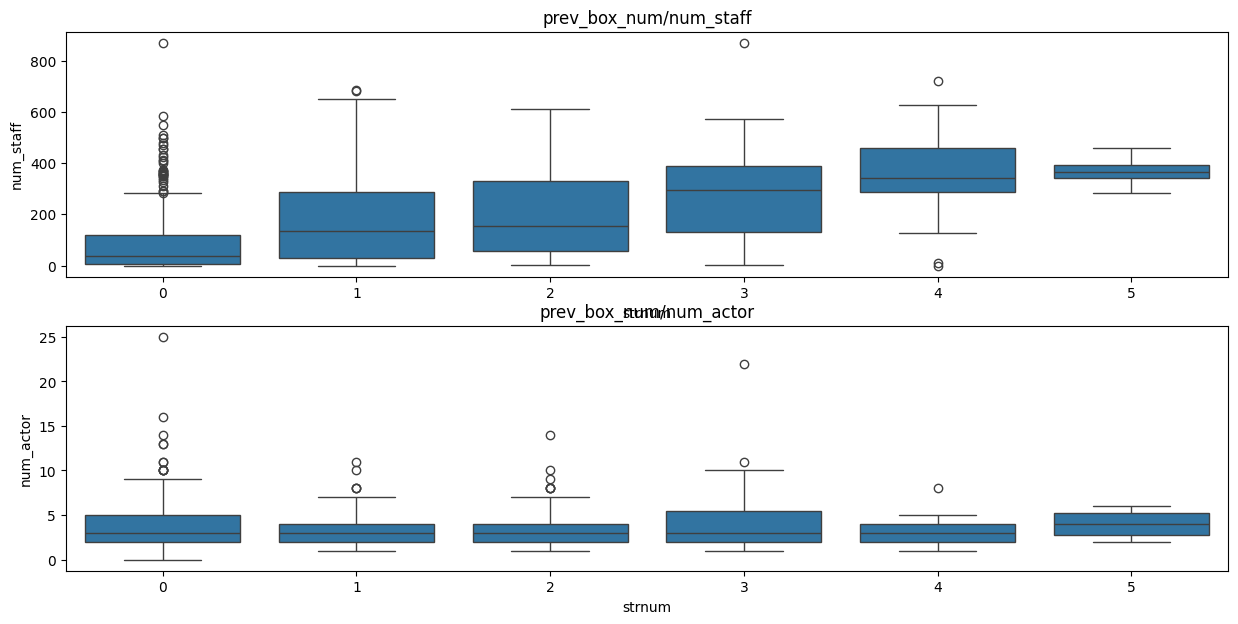

In [ ]:
# 이전 관객 수에 따라 영화의 규모가 달라질까 ?
fig = plt.figure(figsize = (15,7))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
sns.set_style('whitegrid')

train['strnum'] = train['dir_prev_num'].astype(str)
train.sort_values(by='strnum', inplace=True)
sns.boxplot(x='strnum', y='num_staff', data=train, ax=ax1)
sns.boxplot(x='strnum', y='num_actor', data=train, ax=ax2)
ax1.set_title('prev_box_num/num_staff')
ax2.set_title('prev_box_num/num_actor')

감독의 이전 관객 수에 따른 주연배우 수는 유사한 분포를 보인다.
감독의 이전 관객 수에 따른 스태프 수는 감독의 이전 관객수가 증가할수록 중앙값이 증가한다.
- 감독의 이전 관객 수는 다음 영화의 규모 (스태프 수)에 유의미한 영향을 끼친다.
- 감독의 이전 관객 수는 다음 영화의 주연 배우 수에 주는 영향은 미미하다.
- 감독의 평균 관객 수와 유사한 분포를 나타낸다.

## 5. 주연 배우 수에 따른 스텝 수 분석

num_actor (주연 배우수) : 연속형, num_staff (스텝수) : 연속형

### 주연 배우수 시각화

<Axes: xlabel='num_actor', ylabel='Count'>

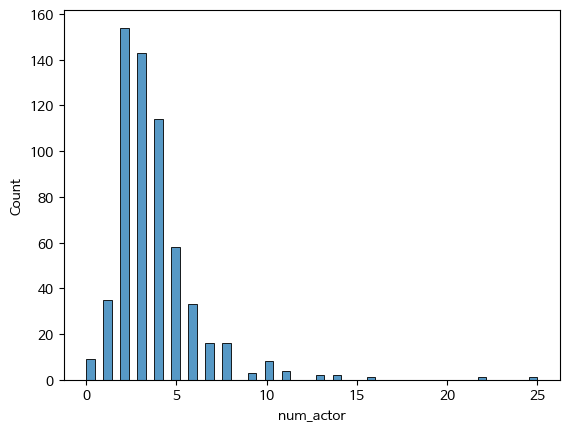

In [ ]:
# num_actor 질량 분포
sns.histplot(x=train['num_actor'])

<Axes: xlabel='num_actor', ylabel='Density'>

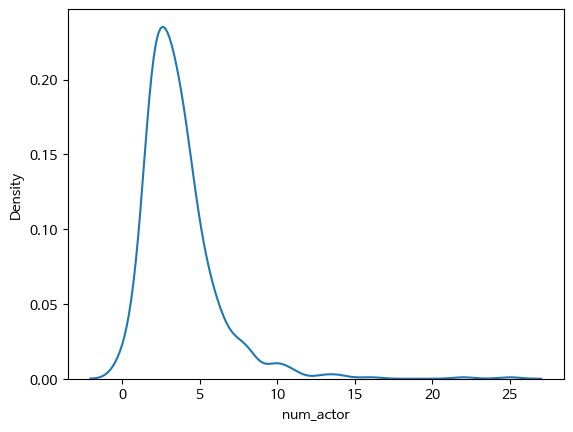

In [ ]:
## num_actor에 대한 질량 밀도 그래프
sns.kdeplot(x=train['num_actor'])

<Axes: xlabel='num_actor', ylabel='Proportion'>

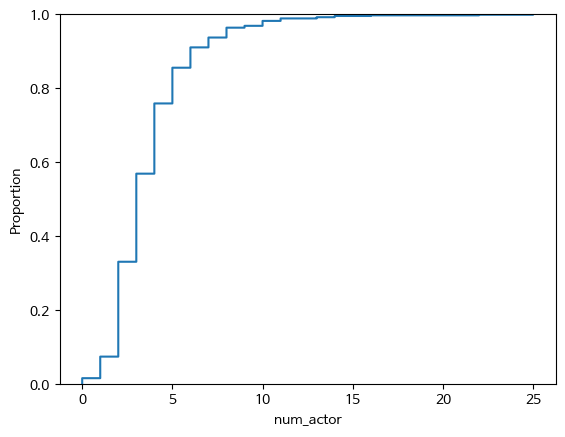

In [ ]:
## num_actor에 대한 ecdf plot (누적 분포 시각화)
sns.ecdfplot(x=train['num_actor'])

<Axes: xlabel='num_actor'>

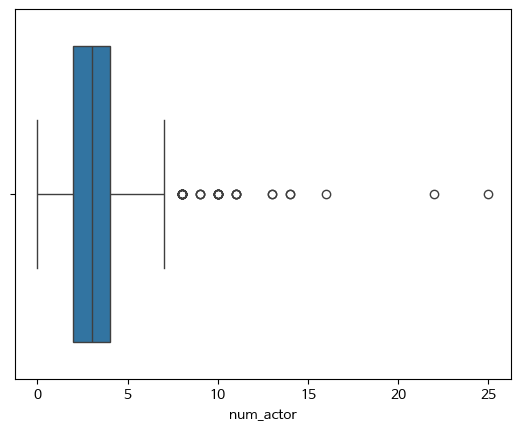

In [ ]:
## num_actor에 대한 boxplot
sns.boxplot(x=train['num_actor'])

주연 배우 수는 0~5 사이가 가장 많다.

### 스텝수 시각화

<Axes: xlabel='num_staff', ylabel='Count'>

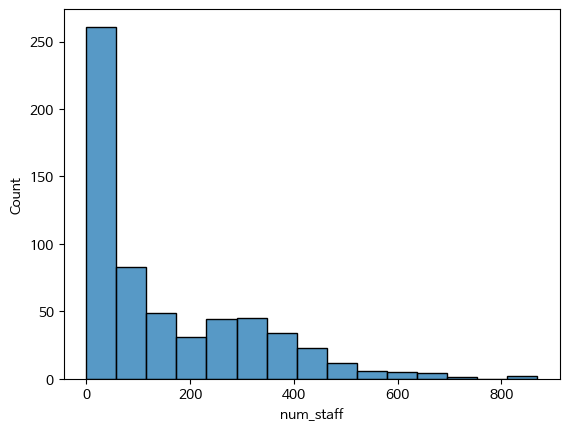

In [ ]:
## num_staff 질량 분포
sns.histplot(x=train['num_staff'])

<Axes: xlabel='num_staff', ylabel='Density'>

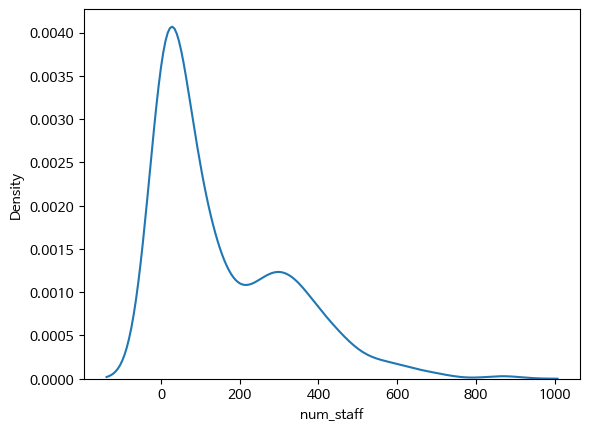

In [ ]:
## num_staff에 대한 질량 밀도 그래프
sns.kdeplot(x=train['num_staff'])

<Axes: xlabel='num_staff', ylabel='Proportion'>

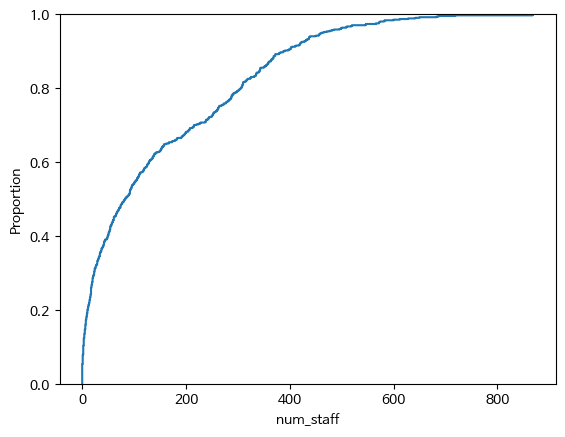

In [ ]:
## num_staff에 대한 ecdf plot (누적 분포 시각화)
sns.ecdfplot(x=train['num_staff'])

<Axes: xlabel='num_staff'>

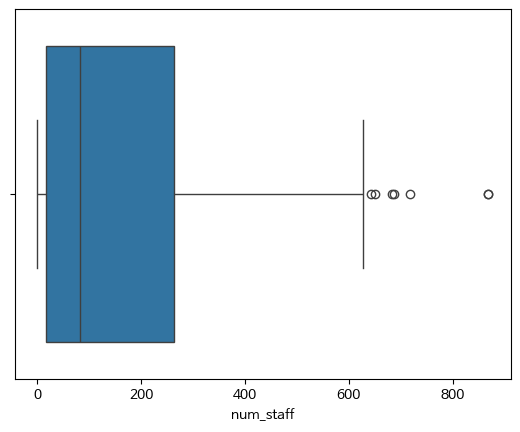

In [ ]:
## num_staff에 대한 boxplot
sns.boxplot(x=train['num_staff'])

스텝수는 0~200 사이가 가장 많다.

### 주연 배우 수에 따른 스텝 수 알아보기

<Axes: xlabel='num_actor', ylabel='num_staff'>

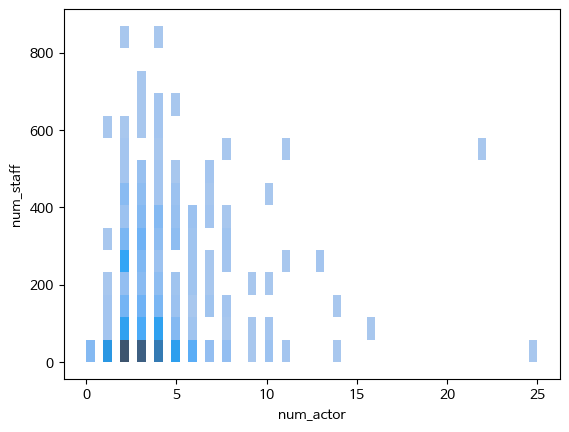

In [ ]:
## num_actor와 num_staff에 관한 질량 분포
sns.histplot(x=train['num_actor'],y=train['num_staff'])

<Axes: xlabel='num_actor', ylabel='num_staff'>

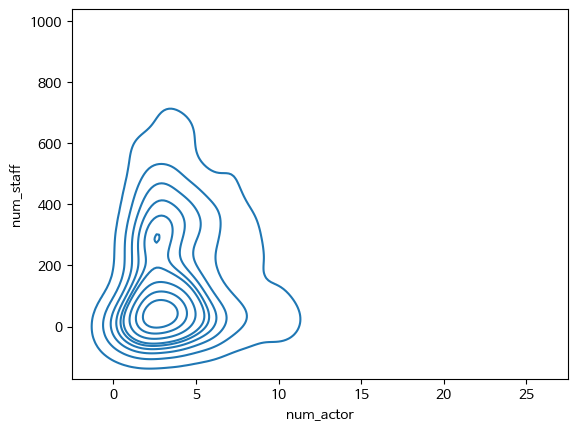

In [ ]:
## num_actor와 num_staff에 대한 질량 밀도 그래프
sns.kdeplot(x=train['num_actor'], y=train['num_staff'])

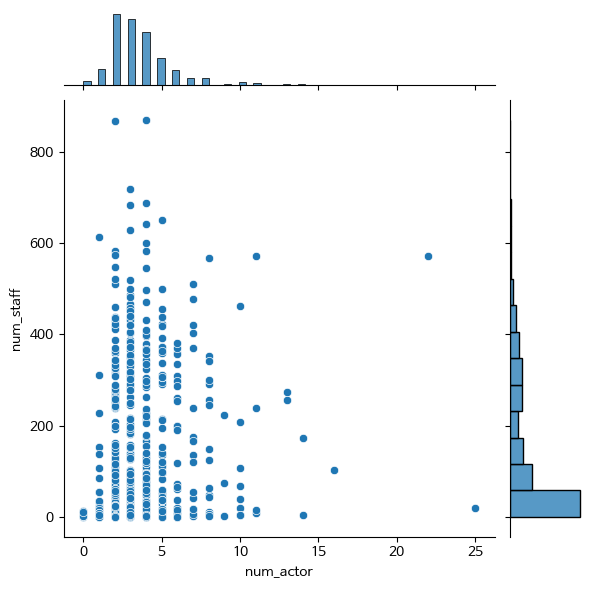

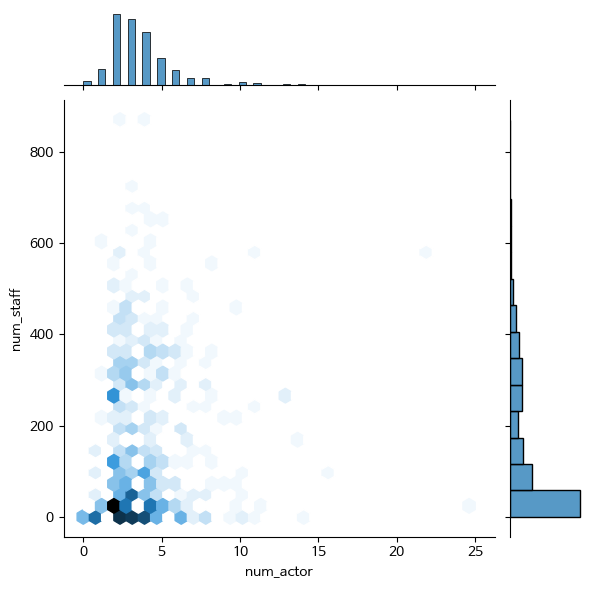

In [ ]:
## num_actor와 num_staff의 분포
sns.jointplot(x=train['num_actor'],y=train['num_staff'],kind='scatter')
sns.jointplot(x=train['num_actor'],y=train['num_staff'],kind='hex')

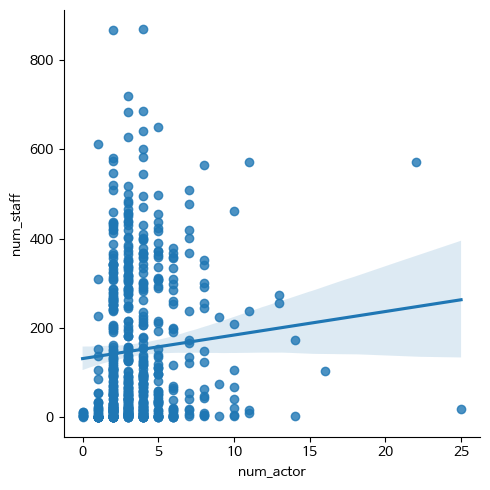

In [ ]:
## num_actor와 num_staff
sns.lmplot(x='num_actor', y='num_staff',data=train)

주연 배우수가 증가할수록 스텝 수 또한 증가하지만, 그닥 큰 폭으로 증가하지는 않는다는 사실을 알 수 있다.



## 6. 장르에 따른 상영시간

### 상영시간 시각화

<Axes: xlabel='time', ylabel='Count'>

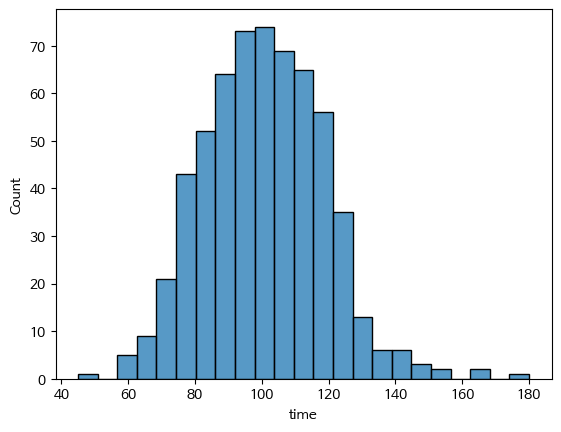

In [ ]:
## time 질량 분포
sns.histplot(x=train['time'])

<Axes: xlabel='time', ylabel='Density'>

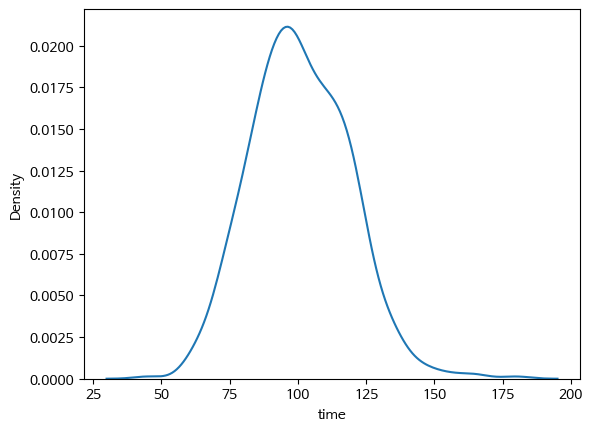

In [ ]:
## time에 대한 질량 밀도 그래프
sns.kdeplot(x=train['time'])

<Axes: xlabel='time', ylabel='Proportion'>

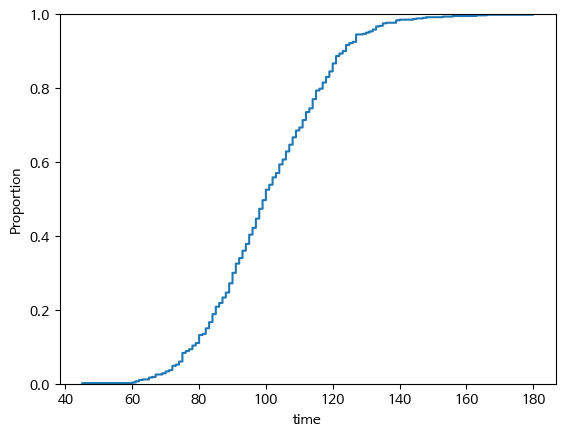

In [ ]:
## time에 대한 ecdf plot (누적 분포 시각화)
sns.ecdfplot(x=train['time'])

<Axes: xlabel='time'>

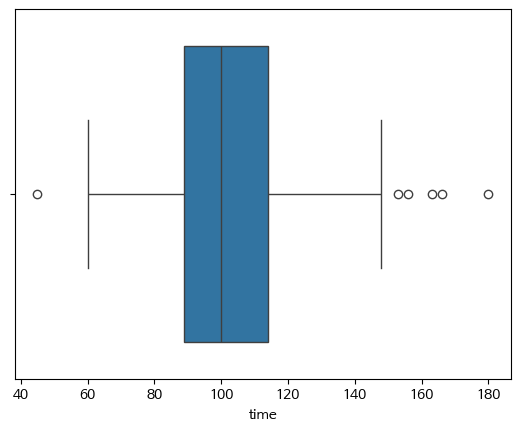

In [ ]:
## time에 대한 boxplot
sns.boxplot(x=train['time'])

100 시간 내외로 가장 분포가 많고, 100시간을 기준으로 분포가 증가했다 감소하는 추세를 볼 수 있다.

### 장르 시각화

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False

<Axes: xlabel='genre', ylabel='count'>

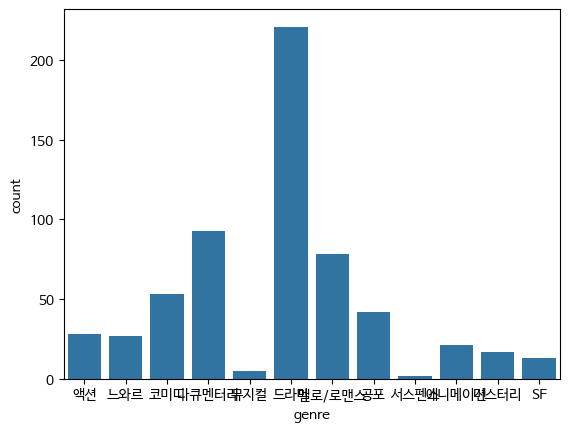

In [ ]:
## genre에 대한 count
sns.countplot(x=train['genre'])

드라마 장르가 다른 장르에 비해 월등히 자료의 개수가 많음을 알 수 있다.

### 장르에 따른 상영시간

<Axes: xlabel='genre', ylabel='time'>

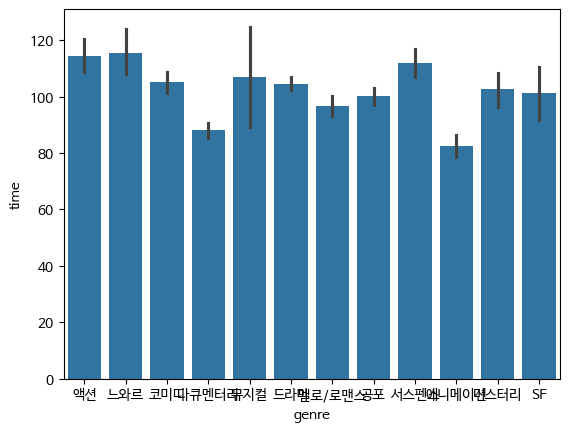

In [ ]:
## time과 genre에 대한 barplot
sns.barplot(x=train['genre'],y=train['time'])

<Axes: xlabel='genre', ylabel='time'>

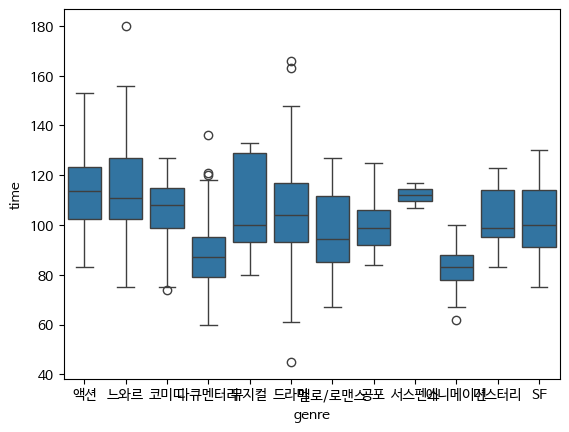

In [ ]:
## time과 genre에 대한 boxplot
sns.boxplot(y=train['time'],x=train['genre'])

<Axes: xlabel='genre', ylabel='time'>

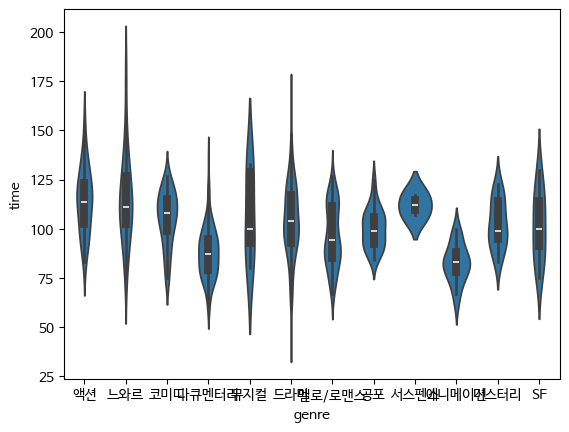

In [ ]:
## time과 genre에 대한 violinplot
sns.violinplot(y=train['time'],x=train['genre'])

<Axes: xlabel='genre', ylabel='time'>

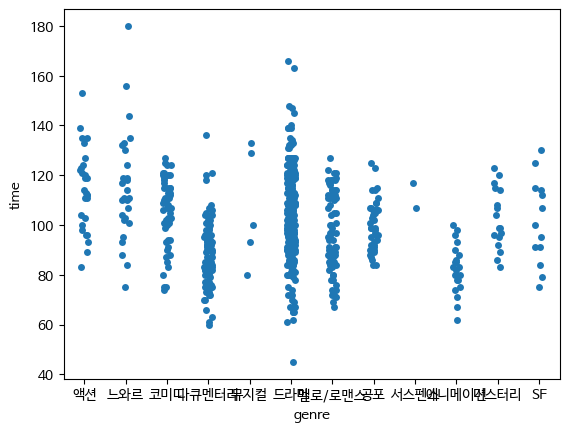

In [ ]:
## time과 genre에 대한 strip plot
sns.stripplot(y=train['time'],x=train['genre'])

<Axes: xlabel='genre', ylabel='time'>

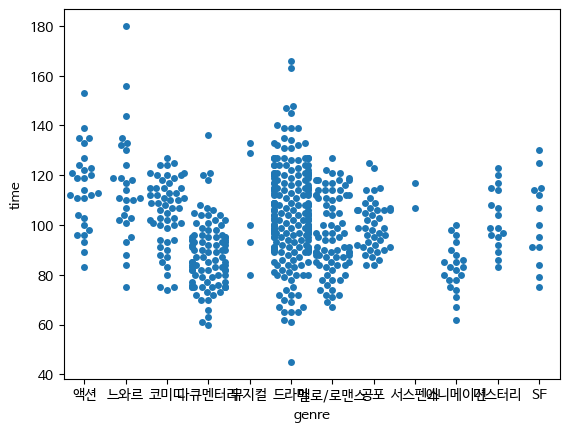

In [ ]:
## time과 genre에 대한 swarm plot
sns.swarmplot(y=train['time'],x=train['genre'])

액션, 느와르, 코미디, 뮤지컬, 드라마, 공포, 서스펜스, 미스터리, SF는 평균적으로 상영 시간이 100분을 넘고, 다큐멘터리, 멜로/로맨스, 애니메이션은 평균적으로 상영시간이 80분 이상 100분 미만임을 알 수 있다.

## 7. 월 별 영화 개봉 시기에 따른 수익 차이

### 1) 월 별 영화 개수의 변화

In [ ]:
train['release_time'].dt.month.head()

0    11
1    11
2     6
3     7
4    11
Name: release_time, dtype: int64

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
x = train.groupby(train['release_time'].dt.month).box_off_num.count()
y = train.groupby(train['release_time'].dt.month).box_off_num.sum()
avg_num = y/x

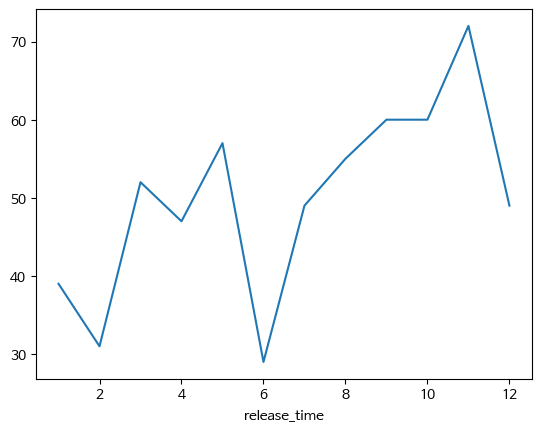

In [ ]:
fig, ax= plt.subplots()
ax = x.plot()
plt.show()

### 2) 월별 관객수의 변화

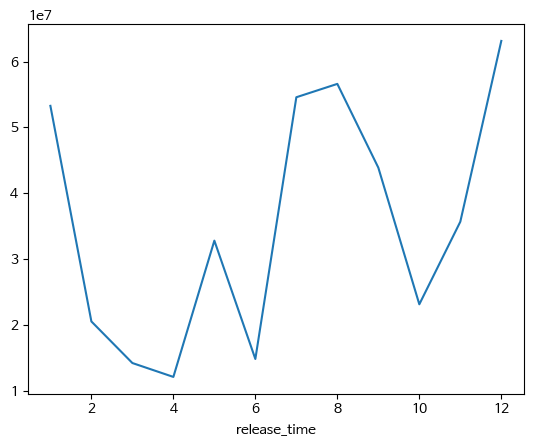

In [ ]:
fig, ax = plt.subplots()
ax = y.plot()
plt.show()

### 3) 월 별 평균 관객 수

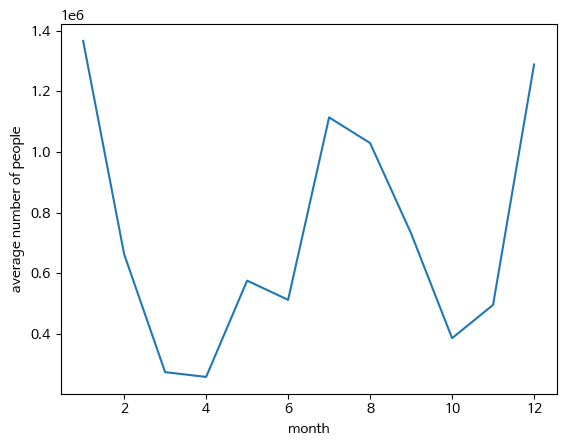

In [ ]:
fig, ax = plt.subplots()
avg_num.plot()

ax.set_ylabel('average number of people')
ax.set_xlabel('month')
plt.show()

## 8. 감독이 영화 제작 전 참여한 영화 개수와 현재 영화 관객 수

### 1) 데뷔 전 작품 개수가 많은 감독 top10

[Text(0, 0, '김현석'),
 Text(1, 0, '이해영'),
 Text(2, 0, '김상진'),
 Text(3, 0, '김휘'),
 Text(4, 0, '유하'),
 Text(5, 0, '이석훈'),
 Text(6, 0, '김대우'),
 Text(7, 0, '정기훈'),
 Text(8, 0, '송해성'),
 Text(9, 0, '신재호')]

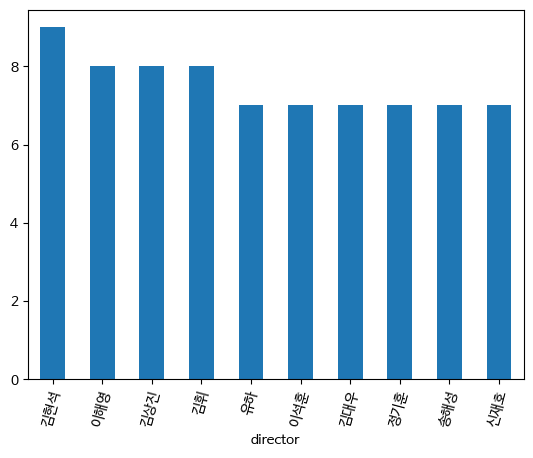

In [ ]:
d1 = train.groupby(train['director']).dir_prev_num.sum().sort_values(ascending = False)[:10]

fig,ax = plt.subplots()
d1.plot(kind='bar')
ax.set_xticklabels(d1.index,rotation = 75)

### 2) 데뷔전 작품 관객 수가 많은 감독 top10

In [ ]:
#데뷔전 작품 관객 수의 평균 top10 감독
d2_avg = (train.groupby(train['director']).dir_prev_bfnum.sum()/train.groupby(train['director']).dir_prev_bfnum.count()).sort_values(ascending=False)[:10]

[Text(0, 0, '고구마'),
 Text(1, 0, '김민석'),
 Text(2, 0, '강형철'),
 Text(3, 0, '심형래'),
 Text(4, 0, '장재현'),
 Text(5, 0, '김용화'),
 Text(6, 0, '정우철'),
 Text(7, 0, '나홍진'),
 Text(8, 0, '성시흡'),
 Text(9, 0, '천성일')]

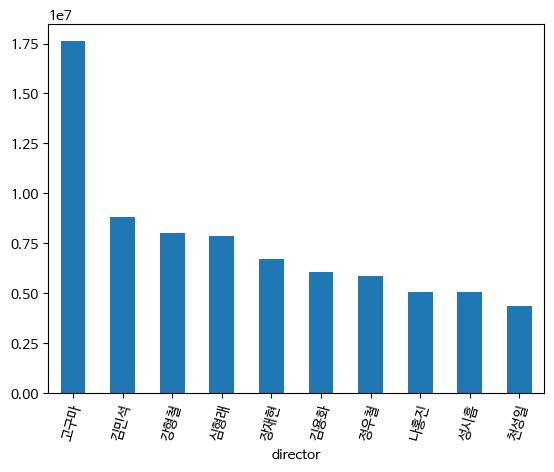

In [ ]:
#평균 관객수
fig, ax = plt.subplots()
d2_avg.plot(kind='bar')
ax.set_xticklabels(d2_avg.index,rotation = 75)

### 3) 데뷔전 영화 수와 현재의 평균 수익 간의 관계

In [ ]:
#train data에서 데뷔전 영화수가 많은 감독 top 10 추출
D1=pd.DataFrame([])
for i in range(len(train.index)):
  for j in range(len(d1.index)):
    if (train['director'][i]==d1.index[j]):
      D1 = D1.append(train.iloc[i])
D1

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
67,열정같은소리하고있네,(주)NEW,드라마,2015-11-25,106,15세 관람가,정기훈,1.502930e+06,4,341,2,654407
86,반창꼬,(주)NEW,드라마,2012-12-19,120,15세 관람가,정기훈,1.178641e+06,3,264,2,2475797
90,인간중독,NEW,드라마,2014-05-14,132,청소년 관람불가,김대우,1.322801e+06,4,379,4,1441990
91,무적자,CJ 엔터테인먼트,액션,2010-09-16,124,15세 관람가,송해성,1.163526e+06,3,546,4,1546132
103,퇴마: 무녀굴,씨네그루(주)키다리이엔티,공포,2015-08-20,105,15세 관람가,김휘,2.043526e+06,5,360,6,120806
179,응징자,인벤트 디,액션,2013-10-30,103,청소년 관람불가,신재호,4.444850e+04,2,151,3,192347
201,강남 1970,(주)쇼박스,액션,2015-01-21,135,청소년 관람불가,유하,1.949111e+06,4,719,3,2192276
218,고령화 가족,CJ 엔터테인먼트,드라마,2013-05-09,112,15세 관람가,송해성,1.259178e+06,4,310,5,1141222
297,시라노; 연애조작단,롯데엔터테인먼트,멜로/로맨스,2010-09-16,117,12세 관람가,김현석,1.158640e+06,2,342,8,2684798
322,히말라야,CJ 엔터테인먼트,드라마,2015-12-16,124,12세 관람가,이석훈,3.549473e+06,4,520,2,7759711


In [ ]:
D1_N = D1.groupby(D1['director']).count().loc[:,'box_off_num']
D1_B = D1.groupby(D1['director']).box_off_num.sum()
D1_AVG = (D1_B/D1_N).sort_values(ascending=False)

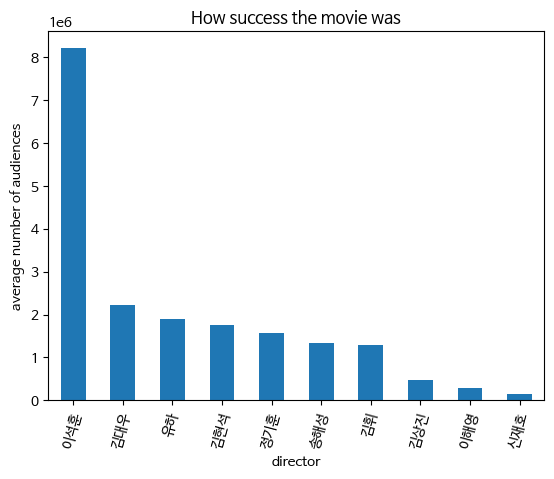

In [ ]:
fig, ax = plt.subplots()
# sns.barplot(x=D1['director'],y=D1_AVG) 이 부분은 삭제하거나 주석 처리합니다.
D1_AVG.plot(kind='bar', ax=ax)  # D1_AVG를 직접 사용하여 바 차트를 그립니다.
ax.set_xticklabels(D1_AVG.index, rotation=75)  # D1_AVG의 인덱스(감독 이름)를 x축 레이블로 설정합니다.
plt.title('How success the movie was')
plt.ylabel('average number of audiences')
plt.show()

위의 결과와 1의 결과를 비교하면, 데뷔전 많은 영화를 찍은 순으로 성공하는 건 아니란 걸 알 수 있다.

### 4. 데뷔 전 성공한 영화가 많을 수록 데뷔 후 성공할 확률이 높은지

In [ ]:
#train data에서 데뷔전 관객수가 많은 감독 top 10 추출
D2=pd.DataFrame([])
for i in range(len(train.index)):
  for j in range(len(d2_avg.index)):
    if (train['director'][i]==d2_avg.index[j]):
      D2 = D2.append(train.iloc[i])
D2

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
16,써니,CJ E&M Pictures,코미디,2011-05-04,124,15세 관람가,강형철,8223342.0,1,572,11,7453715
76,사랑이 무서워,롯데엔터테인먼트,멜로/로맨스,2011-03-10,112,15세 관람가,정우철,5849451.0,3,310,2,402876
118,라스트 갓파더,영구아트무비,코미디,2010-12-29,103,12세 관람가,심형래,7855474.0,1,31,5,2541603
214,초능력자,(주)NEW,SF,2010-11-10,114,15세 관람가,김민석,8801639.0,2,500,3,2130645
326,검은 사제들,CJ 엔터테인먼트,미스터리,2015-11-05,108,15세 관람가,장재현,6720926.5,2,369,2,5443049
338,타부 : 금지된 사랑,고구마공작소,멜로/로맨스,2015-09-03,78,청소년 관람불가,고구마,17615314.0,1,27,3,8
409,타짜-신의 손,롯데엔터테인먼트,드라마,2014-09-03,147,청소년 관람불가,강형철,7838528.5,2,583,4,4015364
433,플랜맨,롯데엔터테인먼트,코미디,2014-01-09,115,15세 관람가,성시흡,5046096.0,1,192,2,635744
434,미스터 고,(주)쇼박스,드라마,2013-07-17,132,12세 관람가,김용화,6081480.0,1,422,2,1329061
477,황해,(주)쇼박스,느와르,2010-12-22,156,청소년 관람불가,나홍진,5046096.0,1,683,3,2260512


In [ ]:
# 데뷔 후 영화 평균 관객 수 정리
D2_avg = D2.groupby(D2['director']).box_off_num.sum()/D2.groupby(D2['director']).box_off_num.count()
D2_avg = D2_avg.sort_values(ascending = False)

Text(0, 0.5, 'average number of audiences')

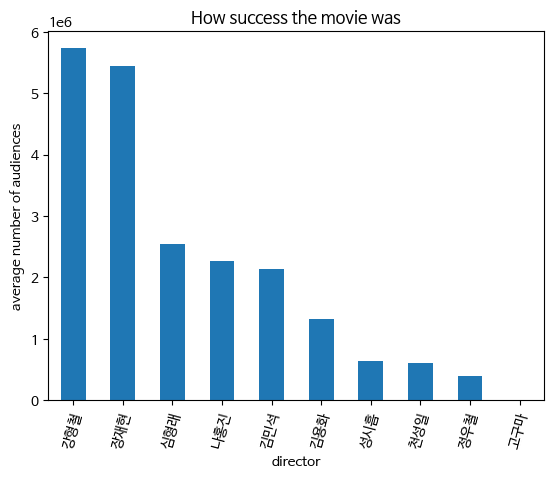

In [ ]:
#그래프 그리기
fig, ax = plt.subplots()
D2_avg.plot(kind='bar')
ax.set_xticklabels(D2_avg.index,rotation = 75)
plt.title('How success the movie was')
plt.ylabel('average number of audiences')

위의 결과와 2의 결과를 비교하면, 데뷔전 평균적으로 흥행한 영화를 찍은 순으로 성공하는 건 아니란 걸 알 수 있다.


## 9. 장르에 따른 관객 수

In [ ]:
#장르별 평균 관객수(흥행 정도)를 구함
g_number = train.groupby(train['genre']).count().loc[:,'box_off_num']
g_total = train.groupby(train['genre']).sum().loc[:,'box_off_num']
g_avg = g_total/g_number
g_avg = pd.DataFrame(g_avg)
g_avg

,box_off_num
genre,
SF,1.788346e+06
공포,5.908325e+05
느와르,2.263695e+06
다큐멘터리,6.717226e+04
드라마,6.256898e+05
멜로/로맨스,4.259680e+05
뮤지컬,6.627000e+03
미스터리,5.275482e+05
서스펜스,8.261100e+04


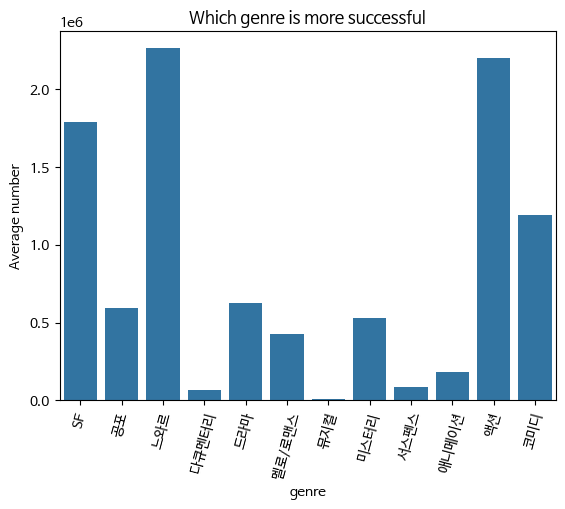

In [ ]:
sns.barplot(data=g_avg, x = 'genre', y='box_off_num')
plt.xticks(rotation= 75)
plt.ylabel('Average number')
plt.title('Which genre is more successful')
plt.show()

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


## 10. 투자 대비 수익 분석 - 스텝 수에 따른 관객 수

Text(0.5, 1.0, 'Efficiency of Movies')

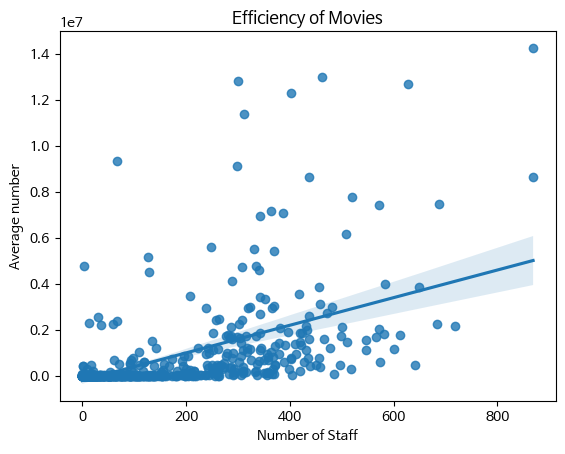

In [ ]:
ax = plt.subplots()
ax = sns.regplot(x = 'num_staff', y='box_off_num', data=train)
ax.set_ylabel('Average number')
ax.set_xlabel('Number of Staff')
ax.set_title('Efficiency of Movies')

Text(0.5, 0.98, 'Efficiency of Movies')

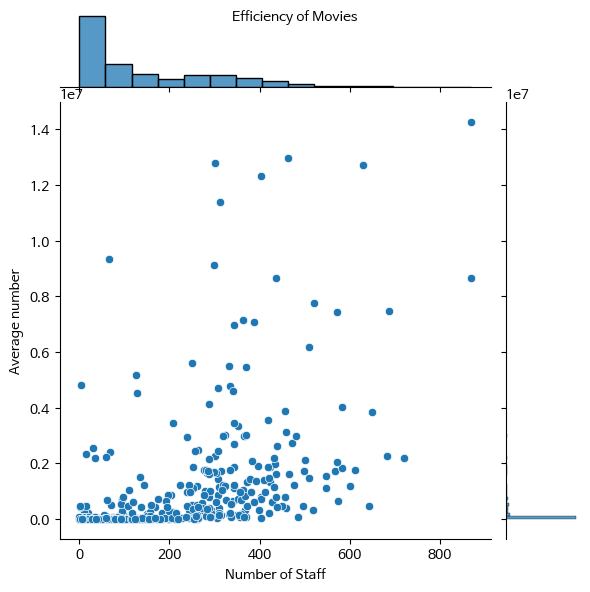

In [ ]:
#추가적으로 그래프 살펴보기
joint = sns.jointplot(x = 'num_staff', y='box_off_num', data=train)
joint.set_axis_labels(xlabel = 'Number of Staff', ylabel='Average number')
joint.fig.suptitle('Efficiency of Movies',fontsize=10)

위 두 그래프로부터, 데이터의 분포에 의해 제대로 된 결과 볼 수 없다는 걸 확인할 수 있음.


In [ ]:
#데이터의 25%-75% 부분만 가지고 확인하자
box_q = train['box_off_num'].sort_values(ascending=False).quantile(q=(0.25,0.75))
staff_q = train['num_staff'].sort_values(ascending=False).quantile(q=(0.25,0.75))
box_q
staff_q

0.25     17.0
0.75    264.0
Name: num_staff, dtype: float64

In [ ]:
B = train[(train['box_off_num']>box_q[0.25]) & (train['box_off_num']<box_q[0.75])]
B = pd.DataFrame(B)
S = train[(train['num_staff']>staff_q[0.25]) & (train['num_staff']<staff_q[0.75])]
S = pd.DataFrame(S)

In [ ]:
train_new = train[
    (train['box_off_num'].isin(B['box_off_num'])) &
    (train['num_staff'].isin(S['num_staff']))
]

In [ ]:
train_new

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.0,2,262,4,233211
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,0.0,0,32,5,53526
14,철가방 우수氏,CJ E&M 영화부문,드라마,2012-11-22,100,12세 관람가,윤학렬,0.0,0,152,1,92404
...,...,...,...,...,...,...,...,...,...,...,...,...
583,창수,(주)마인스 엔터테인먼트,느와르,2013-11-28,103,청소년 관람불가,이덕희,281.0,1,194,5,429141
587,서유기 리턴즈,(주) 영화사조제,SF,2011-02-17,79,전체 관람가,신재호,67602.0,1,220,4,12696
591,아티스트 봉만대,씨너스엔터테인먼트(주),코미디,2013-08-29,101,청소년 관람불가,봉만대,0.0,0,59,4,14188
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,0.0,0,37,5,1958


Text(0.5, 1.0, 'Efficiency of Movies')

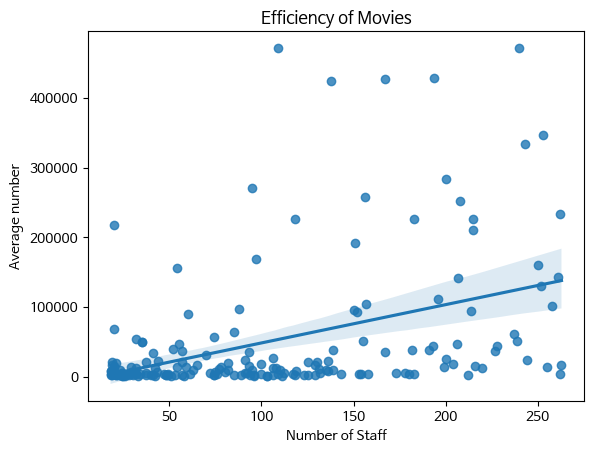

In [ ]:
ax = plt.subplots()
ax = sns.regplot(x = 'num_staff', y='box_off_num', data=train_new)
ax.set_ylabel('Average number')
ax.set_xlabel('Number of Staff')
ax.set_title('Efficiency of Movies')

Text(0.5, 0.98, 'Efficiency of Movies')

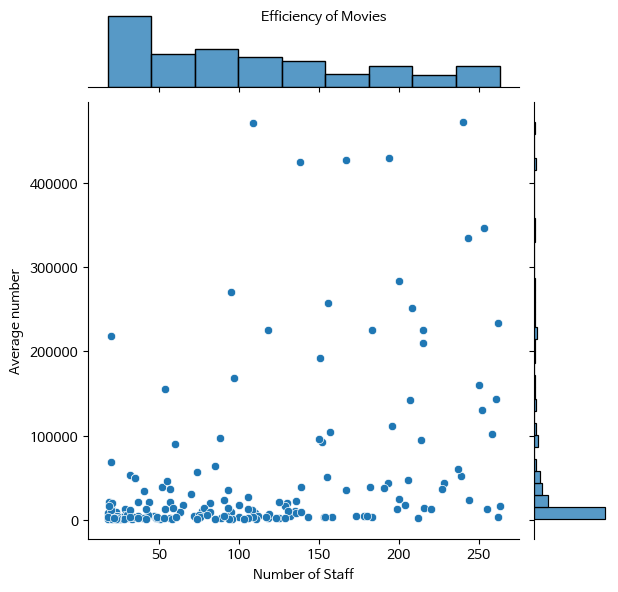

In [ ]:
#추가적으로 그래프 살펴보기
joint = sns.jointplot(x = 'num_staff', y='box_off_num', data=train_new)
joint.set_axis_labels(xlabel = 'Number of Staff', ylabel='Average number')
joint.fig.suptitle('Efficiency of Movies',fontsize=10)